**Importing libraries and downloading the necessities.**

In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import requests
import string
import random
import pandas as pd

nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Download the Files

In [2]:


# URLs of the file
urls = {"War and Peace" : "https://www.gutenberg.org/cache/epub/2600/pg2600.txt",
       "Les Miserables" : "https://www.gutenberg.org/cache/epub/135/pg135.txt",
       "Middlemarch" : "https://www.gutenberg.org/cache/epub/145/pg145.txt",
       "Moby Dick or The Whale" : "https://www.gutenberg.org/cache/epub/2701/pg2701.txt",
       "The Brothers Karamazov" : "https://www.gutenberg.org/cache/epub/28054/pg28054.txt",
       "Bleak House" : "https://www.gutenberg.org/cache/epub/1023/pg1023.txt"}

# Send HTTP request to URL and save responsde in object "r"
for name, url in urls.items():
  r = requests.get(url)

  # Saving received content as a text file
  with open(f'{name}.txt', 'w') as f:
      # write the contents of the response (r.text) to a new file
      f.write(r.text)

  print(f"File {name}.txt downloaded and saved!")


File War and Peace.txt downloaded and saved!
File Les Miserables.txt downloaded and saved!
File Middlemarch.txt downloaded and saved!
File Moby Dick or The Whale.txt downloaded and saved!
File The Brothers Karamazov.txt downloaded and saved!
File Bleak House.txt downloaded and saved!


In [3]:


# Initialize an empty DataFrame
df = pd.DataFrame(columns=['name', 'text', 'total_words'])

# Iterate over each item in the dictionary
for name, url in urls.items():
    # Open the file in read mode
    with open(f'{name}.txt', 'r') as f:
        # Read the file
        text = f.read()

    # Split the file into words
    words = text.split()

    # Get the total number of words
    total_words = len(words)

    # Create a new DataFrame for this row
    new_row = pd.DataFrame({'name': [name], 'text': [text], 'total_words': [total_words]})

    # Concatenate the new row to the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)

# Print the DataFrame
print(df)


                     name                                               text  \
0           War and Peace  ﻿The Project Gutenberg eBook of War and Peace\...   
1          Les Miserables  ﻿The Project Gutenberg eBook of Les Misérables...   
2             Middlemarch  ﻿The Project Gutenberg eBook of Middlemarch\n ...   
3  Moby Dick or The Whale  ﻿The Project Gutenberg eBook of Moby Dick; Or,...   
4  The Brothers Karamazov  ﻿The Project Gutenberg eBook of The Brothers K...   
5             Bleak House  ﻿The Project Gutenberg eBook of Bleak House\n ...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  


# Removing Unnecessary Text From Books with RegEx

## Editing Bleak House

In [4]:


# Function to edit the text
def edit_text(text):
    # Delete words from start of book up until first instance of “London. Michaelmas”
    text = re.sub(r'^(.*?)(London\. Michaelmas)', r'\2', text, flags=re.DOTALL)
    #print(text[0:1000]) #For testing code
    # Remove “Chapter $ROMAN NUMERAL$
    text = re.sub(r'Chapter [IVXLCDM]+', '', text)

    # Remove new lines “\n”
    text = text.replace('\n', ' ')
    # Delete words between end and including “*** END OF THE PROJECT GUTENBERG EBOOK BLEAK HOUSE ***”
    text = re.sub(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK BLEAK HOUSE \*\*\*.*$', '', text, flags=re.DOTALL)
    #print(text[-1000:]) #For testing code
    return text

# Apply the function to the 'text' column of the rows where 'name' is 'Bleak house'
df.loc[df['name'] == 'Bleak House', 'text'] = df.loc[df['name'] == 'Bleak House', 'text'].apply(edit_text)

print(df)

                     name                                               text  \
0           War and Peace  ﻿The Project Gutenberg eBook of War and Peace\...   
1          Les Miserables  ﻿The Project Gutenberg eBook of Les Misérables...   
2             Middlemarch  ﻿The Project Gutenberg eBook of Middlemarch\n ...   
3  Moby Dick or The Whale  ﻿The Project Gutenberg eBook of Moby Dick; Or,...   
4  The Brothers Karamazov  ﻿The Project Gutenberg eBook of The Brothers K...   
5             Bleak House  London. Michaelmas term lately over, and the L...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  


## Editing The Brothers Karamazov

In [5]:
# Function to edit the text
def edit_text(text):
    # Remove from start of book up until “Alexey Fyodorovitch Karamazov”
    text = re.sub(r'^(.*?)(Alexey Fyodorovitch Karamazov)', r'\2', text, flags=re.DOTALL)

    # Remove “Chapter $ROMAN NUMERAL$.” and “Part $ROMAN NUMERAL$
    text = re.sub(r'Chapter [IVXLCDM]+\.', '', text)
    text = re.sub(r'Part [IVXLCDM]+', '', text)

    # Remove “Book $ROMAN NUMERALS$.”
    text = re.sub(r'Book [IVXLCDM]+\.', '', text)

    # Remove new lines “\n”
    text = text.replace('\n', ' ')

    # Remove from end of book up until and including “THE END FOOTNOTES”
    text = re.sub(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK THE BROTHERS KARAMAZOV \*\*\*.*$', '', text, flags=re.DOTALL)

    return text

# Apply the function to the 'text' column of the rows where 'name' is 'The Brothers Karamazov'
df.loc[df['name'] == 'The Brothers Karamazov', 'text'] = df.loc[df['name'] == 'The Brothers Karamazov', 'text'].apply(edit_text)

print(df)

# # Extract the string
# text = df.loc[df['name'] == 'The Brothers Karamazov', 'text'].values[0]

# # Now, 'text' is the string you wanted to extract
# print(text[-100:])

                     name                                               text  \
0           War and Peace  ﻿The Project Gutenberg eBook of War and Peace\...   
1          Les Miserables  ﻿The Project Gutenberg eBook of Les Misérables...   
2             Middlemarch  ﻿The Project Gutenberg eBook of Middlemarch\n ...   
3  Moby Dick or The Whale  ﻿The Project Gutenberg eBook of Moby Dick; Or,...   
4  The Brothers Karamazov  Alexey Fyodorovitch Karamazov was the third so...   
5             Bleak House  London. Michaelmas term lately over, and the L...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  


## Editing "Moby Dick or The Whale"

In [6]:
# Function to edit the text
def edit_text(text):
    # Remove from start of book up until “Call me Ishmael”
    text = re.sub(r'^(.*?)(Call me Ishmael)', r'\2', text, flags=re.DOTALL)

    # Remove “Chapter $#$”
    text = re.sub(r'Chapter \d+', '', text)

    # Remove new lines “\n”
    text = text.replace('\n', ' ')

    # Remove from end of book up until and including “*** END OF THE PROJECT GUTENBERG EBOOK MOBY DICK; OR, THE WHALE ***”
    text = re.sub(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK MOBY DICK; OR, THE WHALE \*\*\*.*$', '', text, flags=re.DOTALL)

    return text

# Apply the function to the 'text' column of the rows where 'name' is 'Moby Dick or The Whale'
df.loc[df['name'] == 'Moby Dick or The Whale', 'text'] = df.loc[df['name'] == 'Moby Dick or The Whale', 'text'].apply(edit_text)

print(df)

# Extract the string
text = df.loc[df['name'] == 'Moby Dick or The Whale', 'text'].values[0]

# Now, 'text' is the string you wanted to extract
print(text[-100:])

                     name                                               text  \
0           War and Peace  ﻿The Project Gutenberg eBook of War and Peace\...   
1          Les Miserables  ﻿The Project Gutenberg eBook of Les Misérables...   
2             Middlemarch  ﻿The Project Gutenberg eBook of Middlemarch\n ...   
3  Moby Dick or The Whale  Call me Ishmael. Some years ago—never mind how...   
4  The Brothers Karamazov  Alexey Fyodorovitch Karamazov was the third so...   
5             Bleak House  London. Michaelmas term lately over, and the L...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  
r retracing search after her missing children, only found another orphan.                           


## Editing Middlemarch

In [7]:
# Function to edit the text
def edit_text(text):
    # Delete words from start of book up until first instance of “Who that cares much to know the history of man”
    text = re.sub(r'^(.*?)(Who that cares much to know the history of man)', r'\2', text, flags=re.DOTALL)

    # Remove “Book $ROMAN NUMERALS$” and “Chapter $ROMAN NUM$”
    text = re.sub(r'Book [IVXLCDM]+', '', text)
    text = re.sub(r'Chapter \d+', '', text)

    # Remove new lines “\n”
    text = text.replace('\n', ' ')

    # Delete words between end and including “*** END OF THE PROJECT GUTENBERG EBOOK MIDDLEMARCH ***”
    text = re.sub(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK MIDDLEMARCH \*\*\*.*$', '', text, flags=re.DOTALL)

    return text

# Apply the function to the 'text' column of the rows where 'name' is 'Middlemarch'
df.loc[df['name'] == 'Middlemarch', 'text'] = df.loc[df['name'] == 'Middlemarch', 'text'].apply(edit_text)

print(df)

# Extract the string
text = df.loc[df['name'] == 'Middlemarch', 'text'].values[0]

# Now, 'text' is the string you wanted to extract
print(text[-100:])

                     name                                               text  \
0           War and Peace  ﻿The Project Gutenberg eBook of War and Peace\...   
1          Les Miserables  ﻿The Project Gutenberg eBook of Les Misérables...   
2             Middlemarch  Who that cares much to know the history of man...   
3  Moby Dick or The Whale  Call me Ishmael. Some years ago—never mind how...   
4  The Brothers Karamazov  Alexey Fyodorovitch Karamazov was the third so...   
5             Bleak House  London. Michaelmas term lately over, and the L...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  
who lived faithfully a hidden life, and rest in unvisited tombs.  THE END                           


## Editing Les Miserables

In [8]:
# Function to edit the text
def edit_text(text):
    # Delete words from start of book up until first instance of “So long as there shall exist, by virtue of law and custom,”
    text = re.sub(r'^(.*?)(So long as there shall exist, by virtue of law and custom,)', r'\2', text, flags=re.DOTALL)

    # Remove “Book First” to “Book Fifteenth” where the book numbers are listed in words “First, Second, Third,…, Fifteenth”.
    text = re.sub(r'Book (First|Second|Third|Fourth|Fifth|Sixth|Seventh|Eighth|Ninth|Tenth|Eleventh|Twelfth|Thirteenth|Fourteenth|Fifteenth)', '', text)

    # Remove “Chapter $Roman Numerals$”
    text = re.sub(r'Chapter [IVXLCDM]+', '', text)

    # Remove “Volume $Roman Numerals$”
    text = re.sub(r'Volume [IVXLCDM]+', '', text)

    # Remove new lines “\n”
    text = text.replace('\n', ' ')

    # Delete words between end and including “*** END OF THE PROJECT GUTENBERG EBOOK LES MISÉRABLES ***”
    text = re.sub(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK LES MISÉRABLES \*\*\*.*$', '', text, flags=re.DOTALL)

    return text

# Apply the function to the 'text' column of the rows where 'name' is 'Les Miserables'
df.loc[df['name'] == 'Les Miserables', 'text'] = df.loc[df['name'] == 'Les Miserables', 'text'].apply(edit_text)

print(df)

# Extract the string
text = df.loc[df['name'] == 'Les Miserables', 'text'].values[0]

# Now, 'text' is the string you wanted to extract
print(text[-100:])

                     name                                               text  \
0           War and Peace  ﻿The Project Gutenberg eBook of War and Peace\...   
1          Les Miserables  So long as there shall exist, by virtue of law...   
2             Middlemarch  Who that cares much to know the history of man...   
3  Moby Dick or The Whale  Call me Ishmael. Some years ago—never mind how...   
4  The Brothers Karamazov  Alexey Fyodorovitch Karamazov was the third so...   
5             Bleak House  London. Michaelmas term lately over, and the L...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  
ing came to pass simply, of itself, as the night comes when day is gone.]                           


## Editing War and Peace

In [9]:
import re

# Function to edit the text
def edit_text(text):
    # Delete words from start of book up until first instance of “Well, Prince, so Genoa and Lucca”
    text = re.sub(r'^(.*?)(Well, Prince, so Genoa and Lucca)', r'\2', text, flags=re.DOTALL)

    # Remove “Chapter $Roman Numerals$”
    text = re.sub(r'Chapter [IVXLCDM]+', '', text)

    # Remove “Book $First-Fifteen$”
    text = re.sub(r'Book (First|Second|Third|Fourth|Fifth|Sixth|Seventh|Eighth|Ninth|Tenth|Eleventh|Twelfth|Thirteenth|Fourteenth|Fifteenth)', '', text)

    # Remove “FIRST/SECOND Epilogue”
    text = re.sub(r'(FIRST|SECOND) Epilogue', '', text)

    # Remove new lines “\n”
    text = text.replace('\n', ' ')

    # Delete words between end and including “*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***”
    text = re.sub(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE \*\*\*.*$', '', text, flags=re.DOTALL)

    return text

# Apply the function to the 'text' column of the rows where 'name' is 'War and Peace'
df.loc[df['name'] == 'War and Peace', 'text'] = df.loc[df['name'] == 'War and Peace', 'text'].apply(edit_text)

print(df)

# Extract the string
text = df.loc[df['name'] == 'War and Peace', 'text'].values[0]

# Now, 'text' is the string you wanted to extract
print(text[-100:])

                     name                                               text  \
0           War and Peace  Well, Prince, so Genoa and Lucca are now just ...   
1          Les Miserables  So long as there shall exist, by virtue of law...   
2             Middlemarch  Who that cares much to know the history of man...   
3  Moby Dick or The Whale  Call me Ishmael. Some years ago—never mind how...   
4  The Brothers Karamazov  Alexey Fyodorovitch Karamazov was the third so...   
5             Bleak House  London. Michaelmas term lately over, and the L...   

  total_words  
0      566321  
1      568641  
2      319402  
3      215831  
4      353881  
5      356507  
s not exist, and to recognize a dependence of which we are not conscious.                           


In [10]:
df["text"]

0    Well, Prince, so Genoa and Lucca are now just ...
1    So long as there shall exist, by virtue of law...
2    Who that cares much to know the history of man...
3    Call me Ishmael. Some years ago—never mind how...
4    Alexey Fyodorovitch Karamazov was the third so...
5    London. Michaelmas term lately over, and the L...
Name: text, dtype: object

**Defining a reusable function to preprocess text.**

In [11]:
#Making a list of stop words in English language
lst_stopwords=set(stopwords.words("english"))

def tk_preprocess_text(text, flg_stemm=False, flg_lemm=False):#, lst_stopwords=None):

    #Tokenizing the text into words, lowercasing, and getting rid of punctuation
    lst_text = re.findall(r'\b\w+\b', text.lower())

    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

**Defining the partitioning function**

In [12]:
#GNG5125 Winter 2024 - Assignment 1 (Group 10)


#Final dataframe can be found in Jupyter variables as 'df'

# Partition text into sections of 100 words
def partitionText(text, seed):
    section_size = 100                                                                    #each partition contians 100 words
    total_partitions = 200                                                                #there are to be 200 partitions of each books text
    #text = text.lower()                                                                   #makes all of the text lower-case for processing
    #text = text.translate(str.maketrans("", "", string.punctuation))                      #removes all of the punctuation from the text
    words = word_tokenize(text)                                                           #the book text being processed is tokenized
    #stop_words = set(stopwords.words('english'))                                          #stop words are labeled from nltk
    #words = [word for word in words if word.lower() not in stop_words]                    #tokenized text is cleaned of stop words
    print(len(words))
    total_words_needed = section_size * total_partitions                                  #total words 200*100 = 20,000 is set
    random.seed(seed)
    start_indices = random.sample(range(len(words) - section_size), total_partitions)
    partitions = [words[i:i + section_size] for i in start_indices]                       #partition subsets are made of 100 word collections of 20,000 word truncated total
    return partitions[:total_partitions]                                                  #returns partitioned book

#Takes list 'partitionedBooks' of [3,200] size and creates a dataframe with book #, partition #, and author labels
def makeBookDF(partitionedBooks, gutenbergBooks, authors):
  booksData = []
  for i, (gutenbergBooks, authors) in enumerate(zip(gutenbergBooks, authors)):   #loops for N number of listed books and their associated author [3]
    for j, partition in enumerate(partitionedBooks[i]):                          #loops for the number of partitions [200] in each book column of the list [i]
      booksData.append({                                                         #adds each column and their respective labels
        'PartitionedText': ' '.join(partition),                                  #adds partition [j] of book [i]
        'BookIndex': i + 1,                                                      #adds book label [i]
        'SectionIndex': j + 1,                                                   #adds section label [j]
        'Author': authors                                                        #adds author [i]
      })
  return pd.DataFrame(booksData)                                                 #returns created dataframe

if __name__ == "__main__":
  partitionedBooks = []
  gutenbergBooks = [                                                             #Variable to define nltk downloaded gutenberg books
    'War and Peace',                                                    #Moby Dick by Herman Melville 1851
    'Les Miserables',                                                     #Alice's Adventures in Wonderland by Lewis Carrol 1865
    'Middlemarch',
    'Moby Dick or The Whale',
    'The Brothers Karamazov',
    'Bleak House'                                                                                                                                                                                                       #The Man who was Thursday by G. K. Chesterton 1908
  ]
  authors = [                                                                    #author labels
    'Leo Tolstoy [a]',
    'Victor Hugo [b]',
    'George Eliot [c]',
    'Herman Melville [d]',
    'Fyodor Dostoyevsky [e]',
    'Charles Dickens [f]'
  ]


**Preprocessing and partitioning**

In [13]:
  books = df["text"]                                          #grabs book text from gutenberg resource
#  for i, book_text in enumerate(books):                                         #loops for each whole text element of each book [3]
#    print(f"Book {i + 1} - First 100 characters:\n{book_text[:100]}\n")         #prints first 1100 words of book
  seed_value = 10
  for bookText in books:                                                         #loops for eahc string containg all of each book's text
    clean_txt = tk_preprocess_text(bookText, flg_stemm=False, flg_lemm=True)
    partitions = partitionText(clean_txt, seed=seed_value)                                         #200 partitions of 100 words each is made using book text

    partitionedBooks.append(partitions)                                          #appending book partitions to list of partitions [3x200]
  df2 = makeBookDF(partitionedBooks, gutenbergBooks, authors)                     #data frame is made for handling / management / labelling


272685
274976
151275
108947
157783
165719


In [14]:
df2.head()

,PartitionedText,BookIndex,SectionIndex,Author
0,doctor held taper leaning one column respectfu...,1,1,Leo Tolstoy [a]
1,held time simple easy step necessary allow tro...,1,2,Leo Tolstoy [a]
2,mary returned room nocturnal talk pierre natás...,1,3,Leo Tolstoy [a]
3,black eyed wide mouthed girl pretty full life ...,1,4,Leo Tolstoy [a]
4,dear friend five year passed since already pet...,1,5,Leo Tolstoy [a]


**Tranforming using Bag of Words transformer.**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=20000)
X = "PartitionedText"
X_counts = count_vect.fit_transform(df2[X])


**Creating the training and test sets for BOW.**








In [16]:
from sklearn.model_selection import train_test_split

# The data (replace this with your actual DataFrame)
#data = df2

# Specify the ratio for the test set
test_size = 0.15  # 20% of the data will be used for the test set

# Set a seed for reproducibility using random_state
random_seed = 55

# Split the data into training and test sets with a specified random state
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_counts, df2['Author'], test_size=test_size, random_state=random_seed)

**Tranforming using TF-IDF**

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(max_features=20000)

X_tf = tfvectorizer.fit_transform(df2['PartitionedText'])
print(X_tf.shape)

(1200, 14827)


**Creating the training and test sets for TF-IDF.**

In [18]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, df2['Author'], test_size=test_size, random_state=random_seed)

In [19]:
y_train_tf

777       Herman Melville [d]
814    Fyodor Dostoyevsky [e]
287           Victor Hugo [b]
114           Leo Tolstoy [a]
214           Victor Hugo [b]
                ...          
541          George Eliot [c]
968    Fyodor Dostoyevsky [e]
295           Victor Hugo [b]
666       Herman Melville [d]
461          George Eliot [c]
Name: Author, Length: 1020, dtype: object

**Importing plotting libraries**





In [20]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

**Data analysis**


Based on the plot, each book has about 160 partitions in the training set, indicating proper sampling.

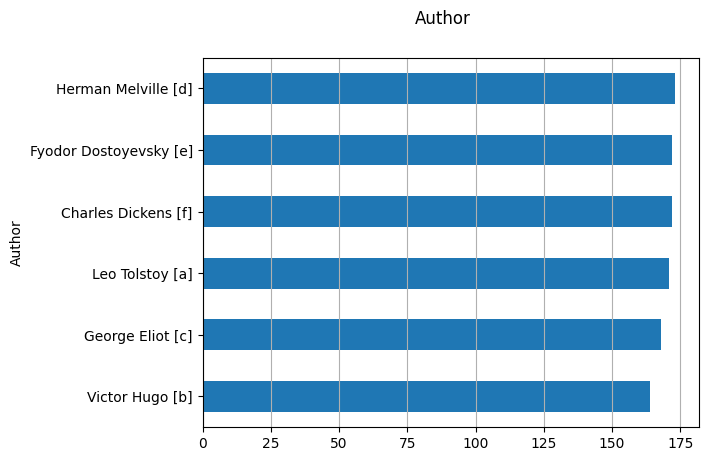

In [21]:
Y = "Author"

fig, ax = plt.subplots()
fig.suptitle(Y, fontsize=12)
y_train_bow.reset_index().groupby(Y).count().sort_values(by=
       "index").plot(kind="barh", legend=False,
        ax=ax).grid(axis='x')
plt.show()

**Classification and training Naive Bayes model on the training dataset transformed by BOW.**

In [22]:
from sklearn.naive_bayes import MultinomialNB

classifier_bow_nb = MultinomialNB().fit(X_train_bow, y_train_bow)

**Prepration and evaluation of the TEST data. (Bag of Words + Naive Bayes)**

In [23]:
import numpy as np


predicted_bow_nb = classifier_bow_nb.predict(X_test_bow)

np.mean(predicted_bow_nb == y_test_bow)


0.9722222222222222

**Classification and training Naive Bayes model on the training dataset transformed by TF-IDF.**

In [24]:
classifier_tf_nb = MultinomialNB().fit(X_train_tf, y_train_tf)

**Prepration and evaluation of the TEST data. (TF-IDF + Naive Bayes)**

In [25]:
predicted_tf_nb = classifier_tf_nb.predict(X_test_tf)

np.mean(predicted_tf_nb == y_test_tf)

0.9444444444444444

**New Classifier Algorithm, SVM and training using BOW**

In [26]:
from sklearn.linear_model import SGDClassifier

classifier_bow_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,
                               random_state=42, max_iter=900,
                               tol=None).fit(X_train_bow, y_train_bow)



**Prepration and evaluation of the TEST data. (Bag of Words + SVM)**

In [27]:
predicted_bow_svm = classifier_bow_svm.predict(X_test_bow)

np.mean(predicted_bow_svm == y_test_bow)

0.9666666666666667

**New Classifier Algorithm, SVM and training using TF-IDF**

In [28]:
classifier_tf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,
                               random_state=42, max_iter=100,
                               tol=None).fit(X_train_tf, y_train_bow)

**Prepration and evaluation of the TEST data. (TF-IDF + SVM)**

In [29]:
predicted_tf_svm = classifier_tf_svm.predict(X_test_tf)

np.mean(predicted_tf_svm == y_test_tf)

0.9833333333333333

In [30]:
y_train_bow

777       Herman Melville [d]
814    Fyodor Dostoyevsky [e]
287           Victor Hugo [b]
114           Leo Tolstoy [a]
214           Victor Hugo [b]
                ...          
541          George Eliot [c]
968    Fyodor Dostoyevsky [e]
295           Victor Hugo [b]
666       Herman Melville [d]
461          George Eliot [c]
Name: Author, Length: 1020, dtype: object

**Manually checking the first 10 predicted results with the actual values.**

In [31]:
# prediction

print(list(predicted_tf_svm[:10]))

# Manually see the results of the model
print(list(y_test_tf[:10]))

['George Eliot [c]', 'Victor Hugo [b]', 'Victor Hugo [b]', 'Victor Hugo [b]', 'Charles Dickens [f]', 'Leo Tolstoy [a]', 'Victor Hugo [b]', 'Leo Tolstoy [a]', 'Fyodor Dostoyevsky [e]', 'George Eliot [c]']
['George Eliot [c]', 'Victor Hugo [b]', 'Victor Hugo [b]', 'Victor Hugo [b]', 'Charles Dickens [f]', 'Leo Tolstoy [a]', 'Victor Hugo [b]', 'Leo Tolstoy [a]', 'Fyodor Dostoyevsky [e]', 'George Eliot [c]']


**Confusion Matrix for SVM + TF-IDF model**

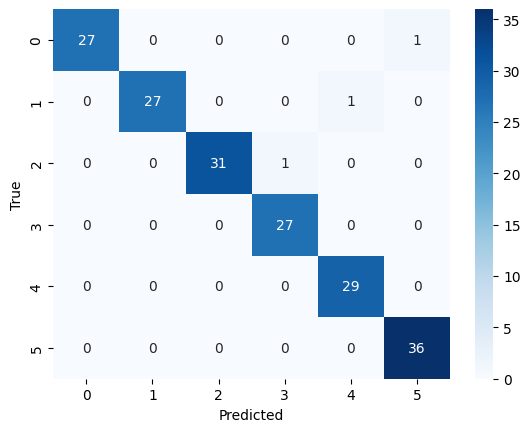

In [32]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test_tf, predicted_tf_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Classification Report for Various Models**

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report , ConfusionMatrixDisplay

print(f"NB + BoW Model Accuracy Score: {accuracy_score(y_test_bow, predicted_bow_nb)}")
print(classification_report(y_test_bow, predicted_bow_svm))

print(f"NB + TF-IDF Model Accuracy Score: {accuracy_score(y_test_tf, predicted_tf_nb)}")
print(classification_report(y_test_tf, predicted_tf_nb))

print(f"SVM + BoW Model Accuracy Score: {accuracy_score(y_test_bow, predicted_bow_svm)}")
print(classification_report(y_test_bow, predicted_bow_svm))

print(f"SVM + TF-IDF Model Accuracy Score: {accuracy_score(y_test_tf, predicted_tf_svm)}")
print(classification_report(y_test_tf, predicted_tf_svm))

NB + BoW Model Accuracy Score: 0.9722222222222222
                        precision    recall  f1-score   support

   Charles Dickens [f]       0.96      0.93      0.95        28
Fyodor Dostoyevsky [e]       1.00      1.00      1.00        28
      George Eliot [c]       0.94      0.94      0.94        32
   Herman Melville [d]       0.96      1.00      0.98        27
       Leo Tolstoy [a]       1.00      0.97      0.98        29
       Victor Hugo [b]       0.95      0.97      0.96        36

              accuracy                           0.97       180
             macro avg       0.97      0.97      0.97       180
          weighted avg       0.97      0.97      0.97       180

NB + TF-IDF Model Accuracy Score: 0.9444444444444444
                        precision    recall  f1-score   support

   Charles Dickens [f]       0.93      1.00      0.97        28
Fyodor Dostoyevsky [e]       0.85      1.00      0.92        28
      George Eliot [c]       1.00      0.97      0.98        